# Pandas - работа с таблицами

Часть 3

## Работа с данными

Загрузим датасет [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?resource=download)

In [1]:
import pandas as pd

students = pd.read_csv("StudentsPerformance.csv")
students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


Узнаем, какие уникальные значения есть в каждой из колонок:

In [2]:
for column in students.columns:
    print(column, ":\n", *students[column].unique())

gender :
 female male
race/ethnicity :
 group B group C group A group D group E
parental level of education :
 bachelor's degree some college master's degree associate's degree high school some high school
lunch :
 standard free/reduced
test preparation course :
 none completed
math score :
 72 69 90 47 76 71 88 40 64 38 58 65 78 50 18 46 54 66 44 74 73 67 70 62 63 56 97 81 75 57 55 53 59 82 77 33 52 0 79 39 45 60 61 41 49 30 80 42 27 43 68 85 98 87 51 99 84 91 83 89 22 100 96 94 48 35 34 86 92 37 28 24 26 95 36 29 32 93 19 23 8
reading score :
 72 90 95 57 78 83 43 64 60 54 52 81 53 75 89 32 42 58 69 73 71 74 70 65 87 56 61 84 55 44 41 85 59 17 39 80 37 63 51 49 26 68 45 47 86 34 79 66 67 91 100 76 77 82 92 93 62 88 50 28 48 46 23 38 94 97 99 31 96 24 29 40
writing score :
 74 88 93 44 75 78 92 39 67 50 52 43 73 70 58 86 28 46 61 63 53 80 72 55 65 38 82 79 83 59 57 54 68 66 62 76 48 42 87 49 10 34 71 37 56 41 22 81 45 36 89 47 90 100 64 98 51 40 84 69 33 60 85 91 77 27 94 95 19 35 32 

Можно сделать это также с помощью метода `apply` (применить функцию к каждой колонке):

In [3]:
def func_uniq(column):
    return column.unique()


uniq_values=students.apply(func_uniq)
uniq_values

gender                                                            [female, male]
race/ethnicity                     [group B, group C, group A, group D, group E]
parental level of education    [bachelor's degree, some college, master's deg...
lunch                                                   [standard, free/reduced]
test preparation course                                        [none, completed]
math score                     [72, 69, 90, 47, 76, 71, 88, 40, 64, 38, 58, 6...
reading score                  [72, 90, 95, 57, 78, 83, 43, 64, 60, 54, 52, 8...
writing score                  [74, 88, 93, 44, 75, 78, 92, 39, 67, 50, 52, 4...
dtype: object

В метод apply можно передавать любую функцию, в том числе [статистические функции](https://numpy.org/doc/stable/reference/routines.statistics.html) из Numpy: `mean`, `median`, `std` и другие.

Различаются ли результаты студентов, которые оплачивают школьный обед полностью, и тех, кто имеет льготы?

In [4]:
standard = students[students["lunch"]=='standard'] # обычные
subsidized = students[students["lunch"]!='standard'] # льготники

С помощью `matplotlib.pyplot` можно построить графики на основе датафреймов:

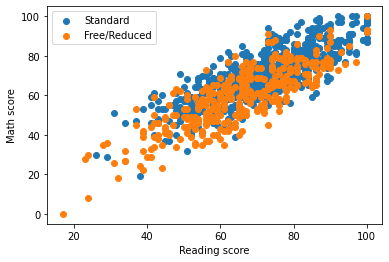

In [5]:
import matplotlib.pyplot as plt

for df in (standard, subsidized):
    plt.scatter(df["reading score"], df["math score"])
lunch_types = ["Standard", "Free/Reduced"] # Запомним эту пару строк
# в отдельную переменную, чтобы не прописывать её каждый раз
plt.legend(lunch_types)
plt.xlabel('Reading score')
plt.ylabel('Math score')
plt.show()

Кажется, что облако точек "Free/Reduced" смещено влево (и вниз) по отношению к облаку точек "Standard". Проверим это с помощью построения ящиков с усами:

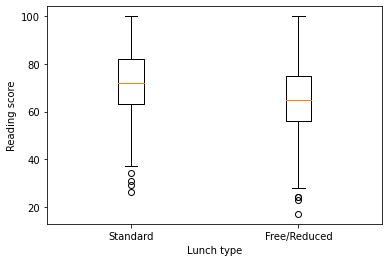

In [9]:
plt.boxplot((standard["reading score"], subsidized["reading score"]),
            labels=lunch_types)
plt.xlabel('Lunch type')
plt.ylabel('Reading score')
plt.show()

Теперь мы видим это более явно.

## Упражнение 1

Для каждого уровня образования родителей (parental level of education) постройте как subplot'ы:
- точечный график результатов экзамена по чтения и экзамена по математике
- точечный график результатов экзамена по чтения и экзамена по письму

## Упражнение 2

Для каждого уровня образования родителей и для каждого экзамена (чтение, письмо, математика) постройте ящики с усами.

## Упражнение 3

Вам дан датасет miceprotein.csv

[Miceprotein.csv на Kaggle](https://www.kaggle.com/datasets/muhammetvarl/mice-protein)

<hr>Уровни экспрессии 77 белков измерены в коре головного мозга 8 классов контрольных мышей и мышей с синдромом Дауна, подвергнутых контекстному обусловливанию страха - задаче, используемой для оценки ассоциативного обучения.

Набор данных состоит из уровней экспрессии 77 белков/белковых модификаций, которые давали детектируемые сигналы в ядерной фракции коры головного мозга. Имеется 38 контрольных мышей и 34 трисомные мыши (синдром Дауна), всего 72 мыши. В экспериментах было зарегистрировано 15 измерений каждого белка на образец/мышь. Таким образом, для контрольных мышей имеется 38x15, или 570 измерений, а для трисомных мышей - 34x15, или 510 измерений. Всего набор данных содержит 1080 измерений для каждого белка. Каждое измерение можно рассматривать как независимый образец/мышь.

Восемь классов мышей описаны на основе таких характеристик, как генотип, поведение и лечение. Согласно генотипу, мыши могут быть контрольными или трисомными. Согласно поведению, одни мыши были стимулированы к обучению (контекст-шок), а другие нет (шок-контекст), и для того, чтобы оценить эффект препарата мемантин в восстановлении способности к обучению у трисомных мышей, некоторым мышам вводили препарат, а другим нет.
</hr>
<hr></hr>

Для датасета miceprotein.csv постройте ящики с усами для уровней экспрессии белков `DYRK1A_N`, `SOD1_N` для каждого класса образцов. ⚠Некоторые данные отсутствуют. Для выбрасывания NaN-значений используйте метод `dropna`.


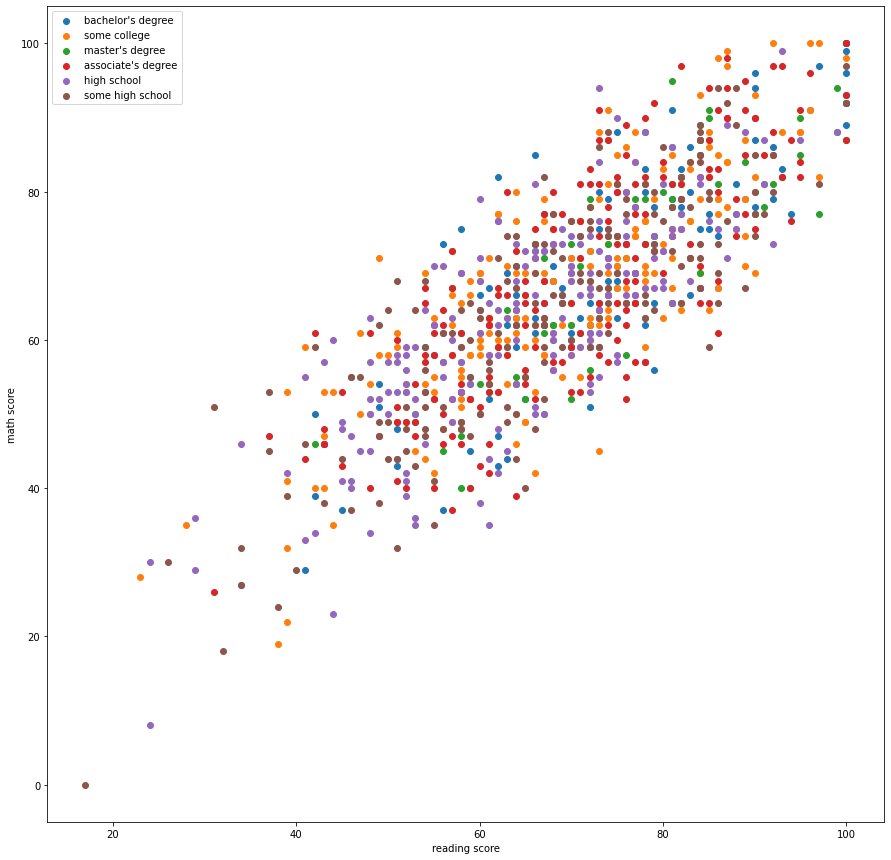

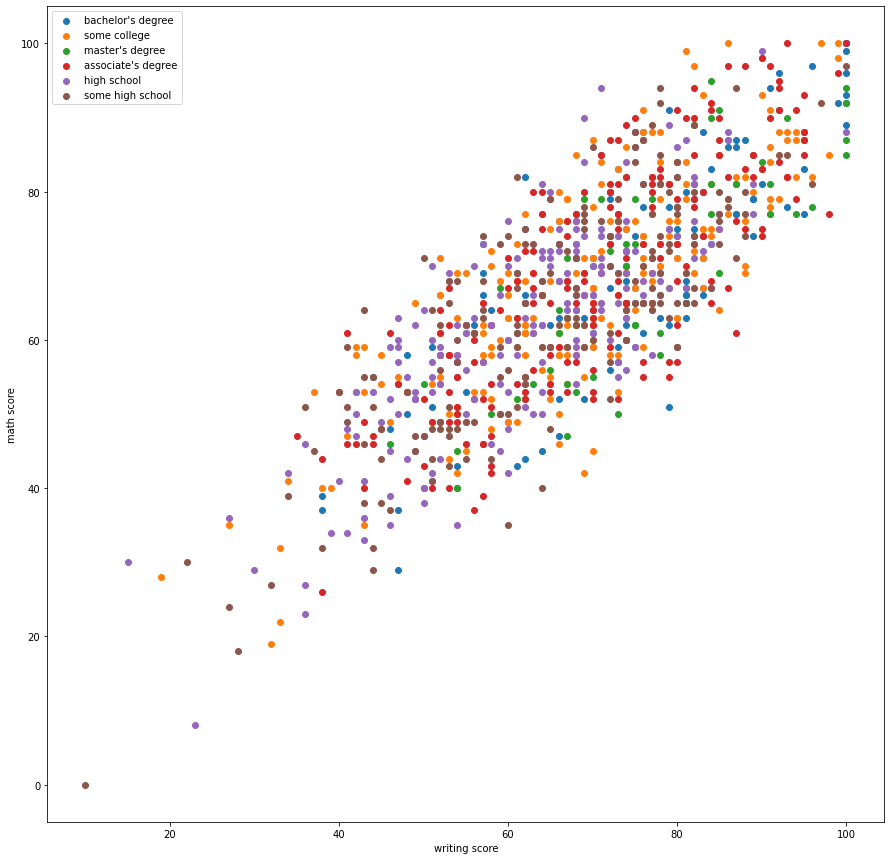

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

students = pd.read_csv("StudentsPerformance.csv")

column = 'parental level of education'

levels = students[column].unique()

for (df1, df2) in [("reading score", "math score"), ("writing score", "math score")]:
    
    plt.figure(figsize=(15, 15))
    
    for level in levels:
        df = students[students[column] == level]
        
        sp = plt.subplot()

        sp.scatter(df[df1], df[df2])

        plt.xlabel(df1)
        plt.ylabel(df2)
        
    plt.legend(levels)
    plt.show()

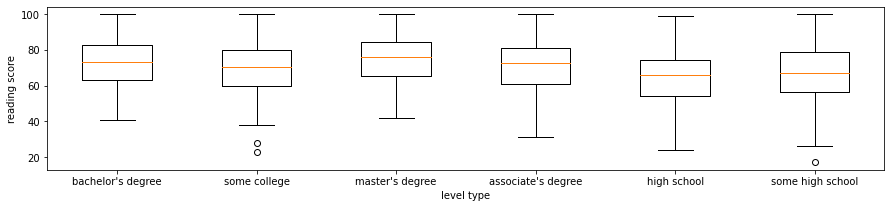

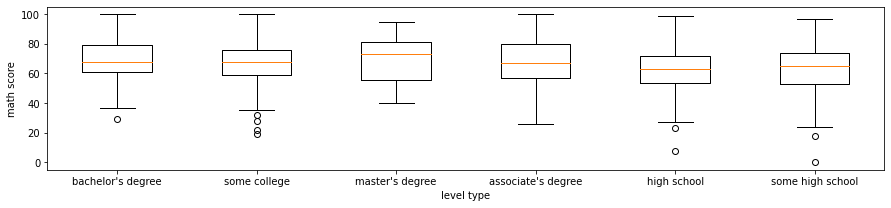

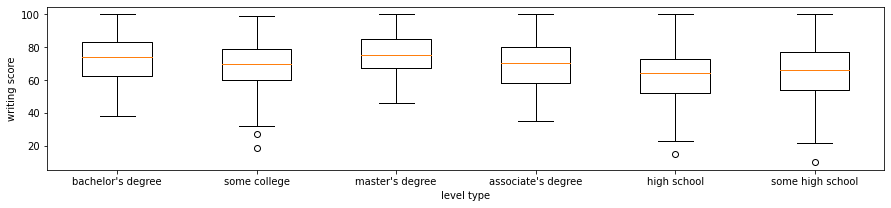

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

students = pd.read_csv("StudentsPerformance.csv")

column = 'parental level of education'

levels = students[column].unique()

scs = ["reading score", "math score", "writing score"]

for sc in scs:
    
    scores = []
    
    for level in levels:
        df = students[students[column] == level]

        scores.append(df[sc])
    
    plt.figure(figsize=(15, 3))
        
    sp = plt.subplot()

    sp.boxplot(tuple(scores), labels=levels)


    plt.xlabel('level type')
    plt.ylabel(sc)
    plt.show()

D:\Programs\Anaconda\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\panen\AppData\Local\Temp/ipykernel_4380/1880609960.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[sc] = df[sc].astype('float')


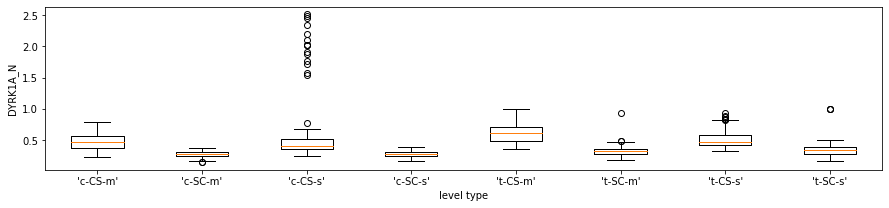

D:\Programs\Anaconda\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\panen\AppData\Local\Temp/ipykernel_4380/1880609960.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[sc] = df[sc].astype('float')


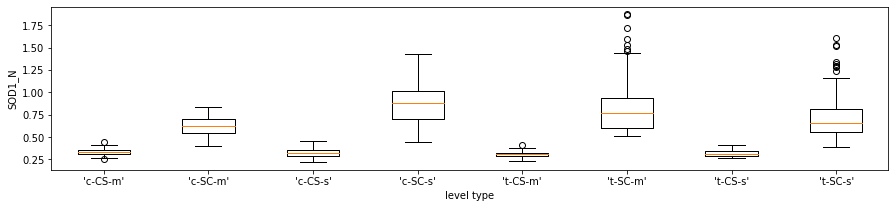

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

students = pd.read_csv("miceprotein.csv")

students.dropna(axis=0, inplace=True)

column = 'class'

levels = students[column].unique()

scs = ["DYRK1A_N", "SOD1_N"]

for sc in scs:
    
    scores = []
    
    for level in levels:
        df = students[students[column] == level]

        df.loc[(df[sc] == '?'), sc] = 1
        
        df[sc] = df[sc].astype('float')
        
        scores.append(df[sc])
    
    plt.figure(figsize=(15, 3))
        
    sp = plt.subplot()

    sp.boxplot(tuple(scores), labels=levels)


    plt.xlabel('level type')
    plt.ylabel(sc)
    plt.show()